In [102]:
import pandas as pd
import sqlite3
from sklearn.preprocessing import StandardScaler 
from itertools import combinations, chain

In [103]:
conn = sqlite3.connect('../data_processing/data/nba_shots.db')

In [104]:
pd.read_sql("select * from shots where date like '%2000'", conn).head()

,Unnamed: 0,date,game_location,shotX,shotY,quarter,player,team,made,distance,shot_type,zone
0,0,10/31/2000,ATL,8.3,20.2,1,Baron Davis,CHH,0,22,2,4
1,1,10/31/2000,ATL,35.9,15.8,1,Jamal Mashburn,CHH,0,16,2,7
2,2,10/31/2000,ATL,24.0,5.0,1,Baron Davis,CHH,0,0,2,15
3,3,10/31/2000,ATL,15.4,5.9,1,Elden Campbell,CHH,0,9,2,14
4,4,10/31/2000,ATL,20.3,25.0,1,David Wesley,CHH,1,20,2,8


In [105]:
pd.read_sql("select player, quarter, count(1) from shots where date like '%2000' group by player", conn).head()

,player,quarter,count(1)
0,A.C. Green,1,106
1,A.J. Guyton,2,75
2,Aaron McKie,1,225
3,Aaron Williams,1,272
4,Adam Keefe,1,45


### Player Profiles

In [115]:
sql_query = """
    select 
        player,
        avg(distance) as avg_distance,
        avg(shotX) as avg_shotX,
        avg(made) as accuracy,
        sum(case when made = 1 then 1 else 0 end) as total_makes,
        sum(case when (made = 1 and quarter = 1) then 1 else 0 end) as q1_makes,
        sum(case when (made = 1 and quarter = 2) then 1 else 0 end) as q2_makes,
        sum(case when (made = 1 and quarter = 3) then 1 else 0 end) as q3_makes,
        sum(case when (made = 1 and quarter = 4) then 1 else 0 end) as q4_makes
    from shots
    where trim(player) <> 'made' and trim(player) <> 'missed'
    group by player
"""

player_profiles = pd.read_sql(sql_query, conn)
player_profiles.head()

,player,avg_distance,avg_shotX,accuracy,total_makes,q1_makes,q2_makes,q3_makes,q4_makes
0,A.C. Green,11.464615,26.744615,0.446154,145,22,57,26,40
1,A.J. Guyton,19.155963,24.989450,0.380734,166,25,45,38,58
2,A.J. Hammons,15.142857,23.254762,0.404762,17,2,0,4,11
3,A.J. Price,18.043597,24.121049,0.383515,563,70,181,95,217
4,Aaron Brooks,14.670170,24.029007,0.417236,2382,517,648,523,694


### Player Profiles by Year

In [107]:
sql_query = """
    select 
        player,
        substr(date,7,4) as year,
        avg(distance) as avg_distance,
        avg(shotX) as avg_shotX,
        avg(made) as accuracy,
        sum(case when made = 1 then 1 else 0 end) as total_makes,
        sum(case when (made = 1 and quarter = 1) then 1 else 0 end) as q1_makes,
        sum(case when (made = 1 and quarter = 2) then 1 else 0 end) as q2_makes,
        sum(case when (made = 1 and quarter = 3) then 1 else 0 end) as q3_makes,
        sum(case when (made = 1 and quarter = 4) then 1 else 0 end) as q4_makes
    from shots
    where trim(player) <> 'made' and trim(player) <> 'missed'
    group by player, substr(date,7,4)
"""
player_profiles_by_year = pd.read_sql(sql_query, conn)
player_profiles_by_year[player_profiles_by_year.player == 'Paul Pierce'].head()

,player,year,avg_distance,avg_shotX,accuracy,total_makes,q1_makes,q2_makes,q3_makes,q4_makes
9211,Paul Pierce,2000,13.053150,23.629921,0.437008,222,57,62,49,54
9212,Paul Pierce,2001,14.093711,22.254316,0.449445,729,176,172,188,193
9213,Paul Pierce,2002,14.029749,22.937839,0.425365,815,232,174,214,195
9214,Paul Pierce,2003,14.085519,22.850798,0.425884,747,205,161,202,179
9215,Paul Pierce,2004,14.731620,23.337259,0.404711,567,181,108,161,117


### Player Profiles by Team

In [ ]:
sql_query = """
    select 
        player,
        team,
        avg(distance) as avg_distance,
        avg(shotX) as avg_shotX,
        avg(made) as accuracy,
        sum(case when made = 1 then 1 else 0 end) as total_makes,
        sum(case when (made = 1 and quarter = 1) then 1 else 0 end) as q1_makes,
        sum(case when (made = 1 and quarter = 2) then 1 else 0 end) as q2_makes,
        sum(case when (made = 1 and quarter = 3) then 1 else 0 end) as q3_makes,
        sum(case when (made = 1 and quarter = 4) then 1 else 0 end) as q4_makes
    from shots
    where trim(player) <> 'made' and trim(player) <> 'missed'
    group by player, team
"""
player_profiles_by_team = pd.read_sql(sql_query, conn)
player_profiles_by_team[player_profiles_by_team.player == 'Paul Pierce'].head()

,player,team,avg_distance,avg_shotX,accuracy,total_makes,q1_makes,q2_makes,q3_makes,q4_makes
4591,Paul Pierce,BOS,14.013390,23.734543,0.445272,8014,2423,1675,2275,1641
4592,Paul Pierce,BRK,15.736029,24.351249,0.453032,381,132,80,112,57
4593,Paul Pierce,LAC,19.537223,24.076861,0.366197,182,58,51,38,35
4594,Paul Pierce,WAS,17.026490,24.720927,0.451656,341,108,73,115,45


### Player Profiles by Team and Year


In [111]:
sql_query = """
    select 
        player,
        team,
        substr(date,7,4) as year,
        avg(distance) as avg_distance,
        avg(shotX) as avg_shotX,
        avg(made) as accuracy,
        sum(case when made = 1 then 1 else 0 end) as total_makes,
        sum(case when (made = 1 and quarter = 1) then 1 else 0 end) as q1_makes,
        sum(case when (made = 1 and quarter = 2) then 1 else 0 end) as q2_makes,
        sum(case when (made = 1 and quarter = 3) then 1 else 0 end) as q3_makes,
        sum(case when (made = 1 and quarter = 4) then 1 else 0 end) as q4_makes
    from shots
    where trim(player) <> 'made' and trim(player) <> 'missed'
    group by player, team, substr(date,7,4)
"""
player_profiles_by_team_and_year = pd.read_sql(sql_query, conn)
player_profiles_by_team_and_year[player_profiles_by_team_and_year.player == 'Paul Pierce'].head()

,player,team,year,avg_distance,avg_shotX,accuracy,total_makes,q1_makes,q2_makes,q3_makes,q4_makes
11781,Paul Pierce,BOS,2000,13.053150,23.629921,0.437008,222,57,62,49,54
11782,Paul Pierce,BOS,2001,14.093711,22.254316,0.449445,729,176,172,188,193
11783,Paul Pierce,BOS,2002,14.029749,22.937839,0.425365,815,232,174,214,195
11784,Paul Pierce,BOS,2003,14.085519,22.850798,0.425884,747,205,161,202,179
11785,Paul Pierce,BOS,2004,14.731620,23.337259,0.404711,567,181,108,161,117


In [116]:
def get_mode_quarter_makes(row):
    quarter_makes = [row.q1_makes, row.q2_makes, row.q3_makes, row.q4_makes]
    max_quarter_makes = max(*quarter_makes)
    return quarter_makes.index(max_quarter_makes) + 1

player_profiles['top_quarter'] = player_profiles.apply(get_mode_quarter_makes, axis=1)
# player_profiles = player_profiles.drop(columns=['total_makes', 'q1_makes', 'q2_makes', 'q3_makes', 'q4_makes'])
player_profiles.head()

,player,avg_distance,avg_shotX,accuracy,total_makes,q1_makes,q2_makes,q3_makes,q4_makes,top_quarter
0,A.C. Green,11.464615,26.744615,0.446154,145,22,57,26,40,2
1,A.J. Guyton,19.155963,24.989450,0.380734,166,25,45,38,58,4
2,A.J. Hammons,15.142857,23.254762,0.404762,17,2,0,4,11,4
3,A.J. Price,18.043597,24.121049,0.383515,563,70,181,95,217,4
4,Aaron Brooks,14.670170,24.029007,0.417236,2382,517,648,523,694,4


In [113]:
normalized_X = StandardScaler().fit_transform(player_profiles.drop(columns=['player']))
normalized_X[:5]

array([[-0.16633364,  1.25253861,  0.19688979, -0.50161981],
       [ 1.40318391,  0.48090168, -0.41565139,  1.05087547],
       [ 0.58425846, -0.28173226, -0.19067222,  1.05087547],
       [ 1.17619134,  0.09912016, -0.38961187,  1.05087547],
       [ 0.48780061,  0.05865494, -0.07387501,  1.05087547]])

In [63]:
feature_cols = ['avg_distance', 'avg_shotX', 'accuracy', 'top_quarter']
all_combinations = list(chain.from_iterable(combinations(range(4), r) for r in range(1, 5)))
all_combinations

[(0,),
 (1,),
 (2,),
 (3,),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 2),
 (1, 3),
 (2, 3),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 3),
 (1, 2, 3),
 (0, 1, 2, 3)]

In [66]:
normalized_profiles = pd.DataFrame(normalized_X, columns=feature_cols)
normalized_profiles['player'] = player_profiles.player
normalized_profiles.head()

,avg_distance,avg_shotX,accuracy,top_quarter,player
0,0.148700,0.882261,-0.075456,-0.164646,A.C. Green
1,1.614439,-0.134764,-0.584386,0.686027,A.J. Guyton
2,0.521962,-0.438841,0.934658,-0.164646,Aaron McKie
3,-1.176065,-0.059346,0.267359,1.536700,Aaron Williams
4,-0.631857,-0.386926,0.606216,-0.164646,Adam Keefe


In [67]:
# 1-d similarity
selected_player_stat = player_profiles[player_profiles.player == 'A.C. Green'].avg_distance.values[0]
# selected_player_stat
player_profiles.iloc[(player_profiles['avg_distance']-selected_player_stat).abs().argsort()[:4]]

,player,avg_distance,avg_shotX,accuracy,top_quarter
0,A.C. Green,11.896226,25.883019,0.415094,2
16,Anthony Johnson,11.902778,22.823611,0.375000,1
136,Erick Barkley,11.909091,24.554545,0.545455,4
335,Sean Rooks,11.910112,23.203933,0.438202,2


In [ ]:
for comb in all_combinations:
    m = len(comb)
    if m == 1: continue

    

1
1
1
1
2
2
2
2
2
2
3
3
3
3
4


For n_clusters = 2 The average silhouette_score is : 0.49170977276211536
For n_clusters = 3 The average silhouette_score is : 0.43257740940466294
For n_clusters = 4 The average silhouette_score is : 0.536990378669208
For n_clusters = 5 The average silhouette_score is : 0.5278983743347301
For n_clusters = 6 The average silhouette_score is : 0.39704012100168945


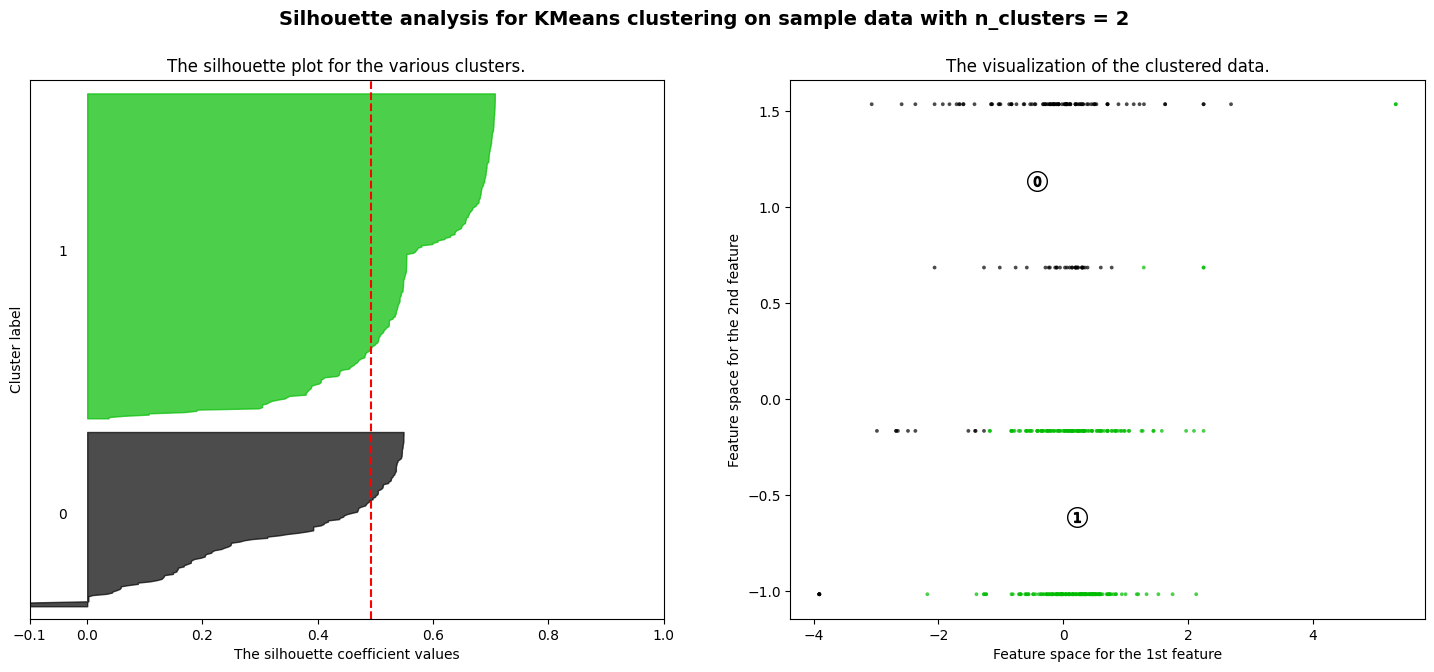

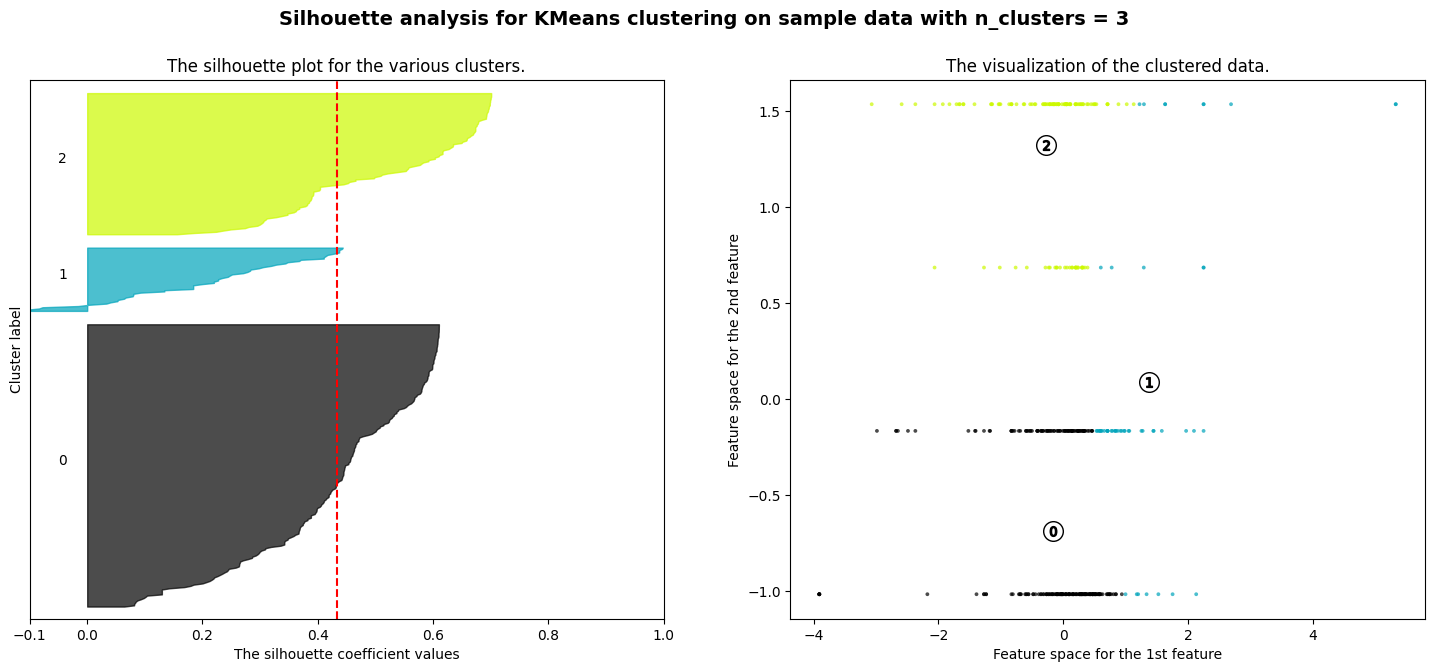

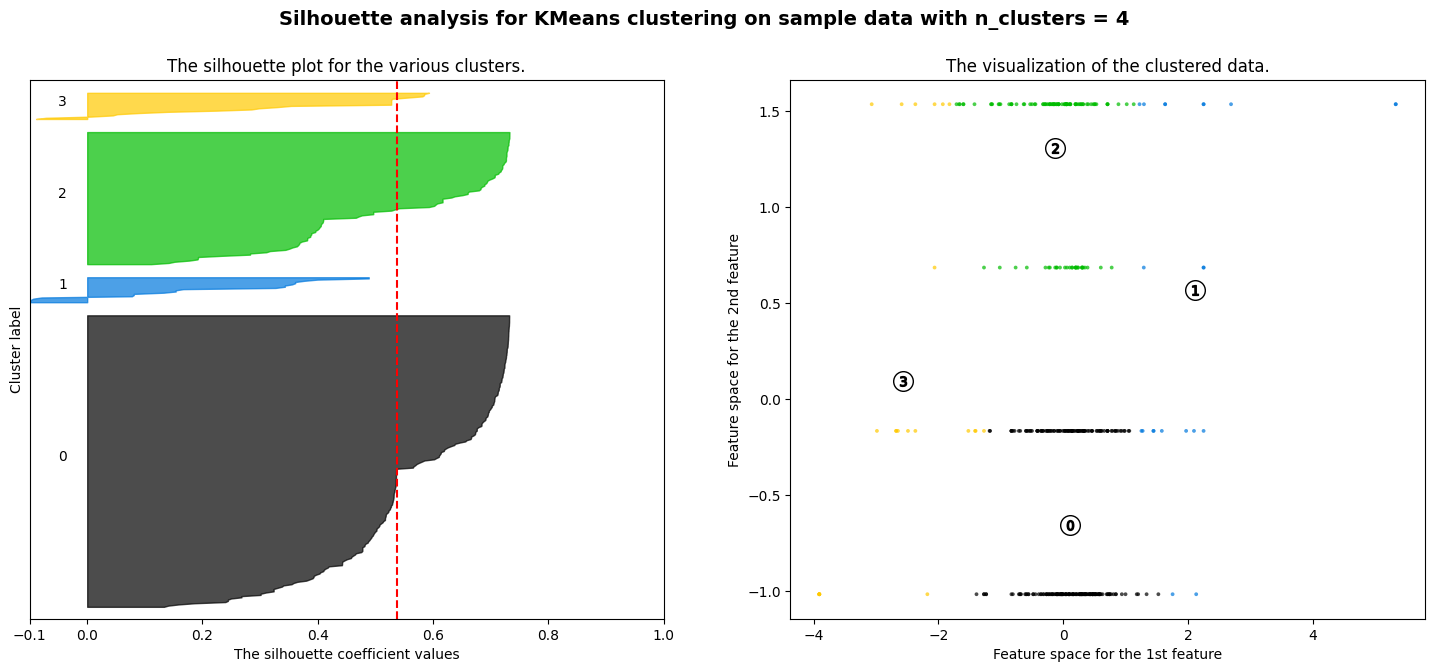

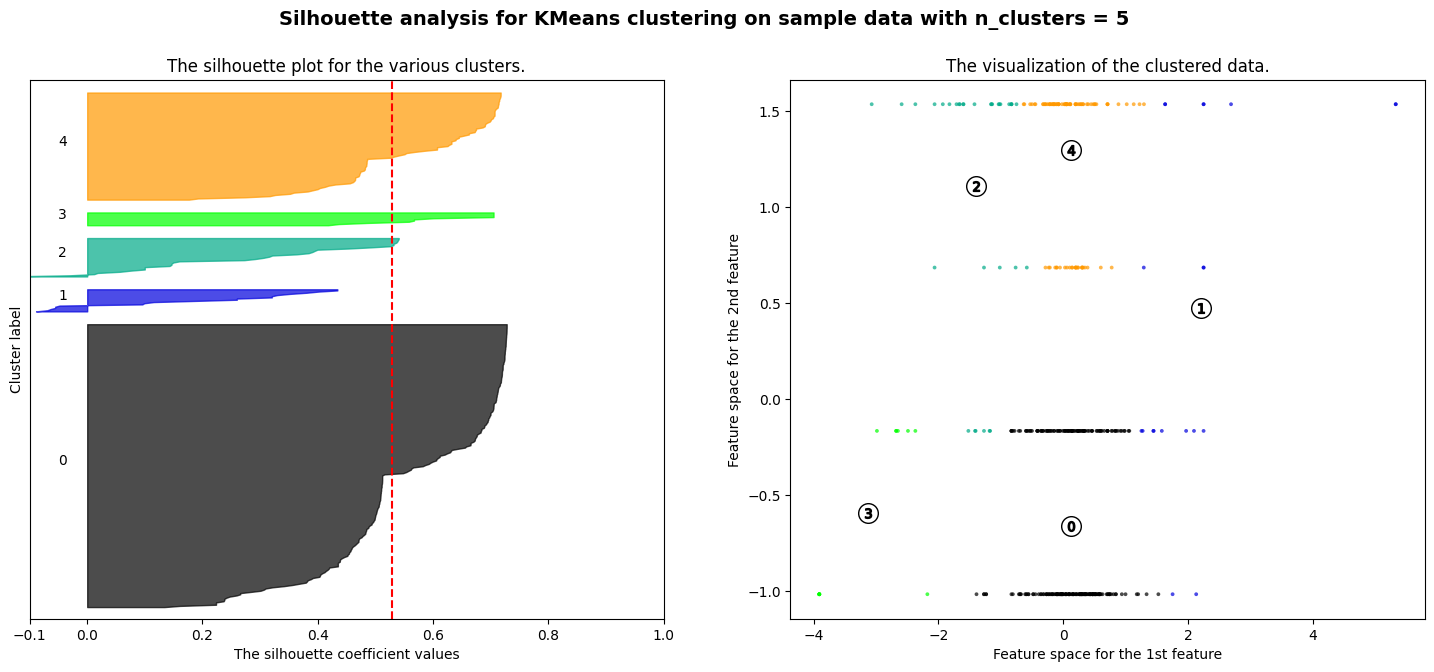

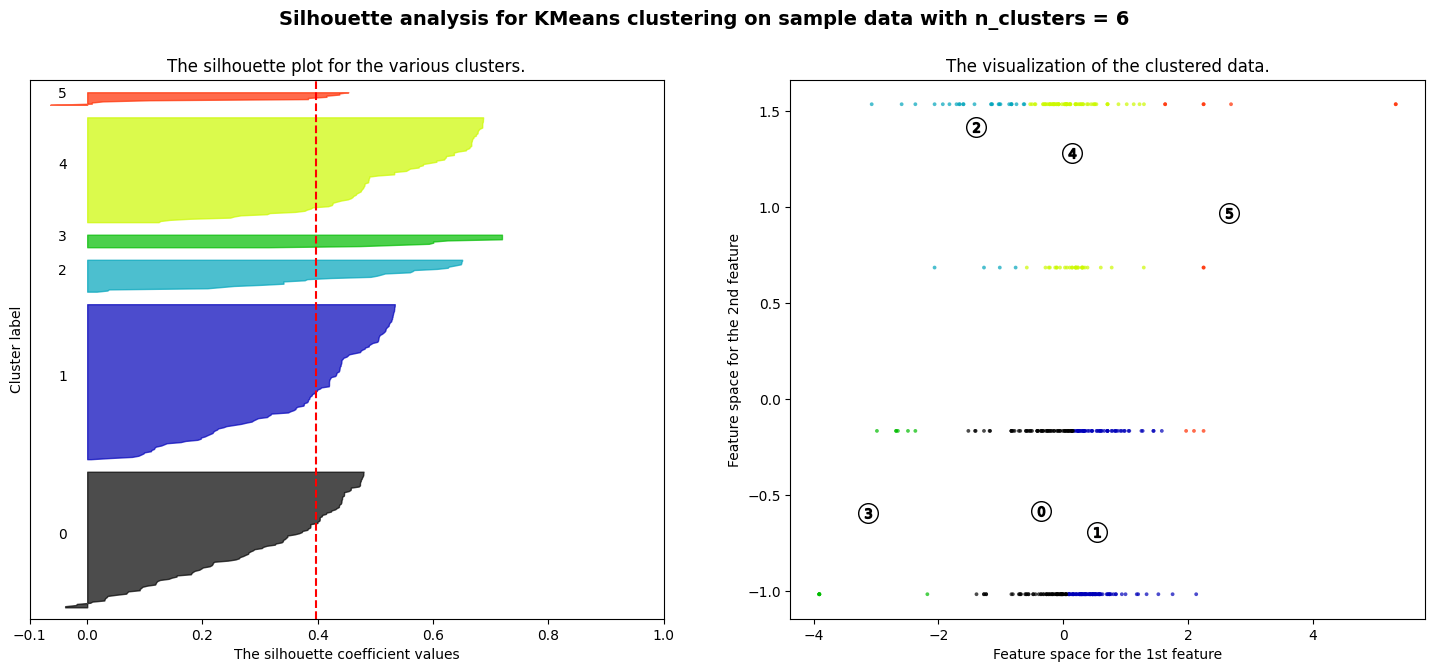

In [78]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# # Generating the sample data from make_blobs
# # This particular setting has one distinct cluster and 3 clusters placed close
# # together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

X = normalized_X[:,2:4]

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()